In [1]:
import pandas as pd
import numpy as np

In [33]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Cars_Mumbai.csv to Cars_Mumbai (1).csv


In [2]:
cars = pd.read_csv('Cars_Mumbai.csv')

cars

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,1st
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,2nd
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,3rd
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,1st
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,1st
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Manual,1st
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Manual,4th
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Manual,1st
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Manual,1st


The length of data seems a bit more, we shall cut short it to the required lenght.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   transmission   8128 non-null   object
 6   owner          8128 non-null   object
dtypes: int64(3), object(4)
memory usage: 444.6+ KB


There are no null values.

There are 4 columns which are object datatype

    name

    fuel

    transmission

    owner

In [5]:
cars.describe()

,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,2013.804011,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,1983.000000,2.999900e+04,1.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,9.800000e+04
max,2020.000000,1.000000e+07,2.360457e+06


Price Max : 1,00,00,000

Km Driven Max : 23,60,457

Year Max : 2020

Price Min : 30000

Km Driven Min : 1

Year Min : 1983

The Maximum value for each column seems to be very high and that means, the Outliers.

The outliers in the cases like these cannot be compromised as some vehicles might have covered the distance of such long, or the prices could be that high.

We shall visualise the outliers later in the visualization part.

Price Mean : 638271.8077017716

Km Driven Mean : 69819.51082677166

Year Mean : 2013.8040108267717

In [6]:
# Looking and Checking the distribution categorical data

def checkDistributionCategorical(data):
    ch1 = data.fuel.value_counts()
    ch2 = data.transmission.value_counts()
    ch4 = data.owner.value_counts()

    print(f'Fuel Data :\n{ch1}\n')
    print(f'Transmission Data :\n{ch2}\n')
    print(f'Owner :\n{ch4}\n')

checkDistributionCategorical(cars)

Fuel Data :
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

Transmission Data :
Manual       7078
Automatic    1050
Name: transmission, dtype: int64

Owner :
1st               5289
2nd               2105
3rd                555
4th                174
Test Drive Car       5
Name: owner, dtype: int64



As the categorical data isn't something that the model can process. thus, we shall assign the numbers to it for the model to understand.

In [7]:
# Encode Fuel Data
cars.replace({'fuel':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}}, inplace=True)

# Encode Transmission Data
cars.replace({'transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

# Encode Owner Data
cars.replace({'owner':{'1st': 0, '2nd': 1, '3rd': 2, '4th': 3, 'Test Drive Car': 4}}, inplace=True)

In [8]:
cars

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,3
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0
8126,Tata Indigo CR4,2013,290000,25000,0,0,0


In [9]:
correlation = cars.corr()

correlation

,year,selling_price,km_driven,fuel,transmission,owner
year,1.000000,0.414092,-0.418006,-0.063381,0.244707,-0.504905
selling_price,0.414092,1.000000,-0.225534,-0.205453,0.588845,-0.221915
km_driven,-0.418006,-0.225534,1.000000,-0.240273,-0.201229,0.282745
fuel,-0.063381,-0.205453,-0.240273,1.000000,0.011879,0.000081
transmission,0.244707,0.588845,-0.201229,0.011879,1.000000,-0.141456
owner,-0.504905,-0.221915,0.282745,0.000081,-0.141456,1.000000


The data and its distribution can be visulaized for a better understanding.

## Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

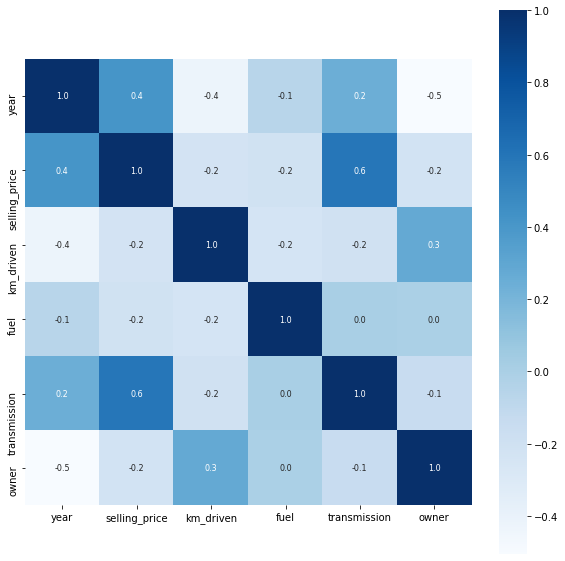

In [12]:
# Setting sns theme
#sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

## Univariate - Analysis

### Boxplot

Text(0.5, 0, 'selling_price')

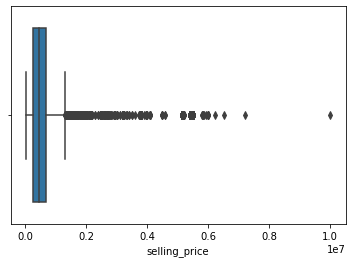

In [13]:
#selling price outliers visualized
sns.boxplot(x=cars['selling_price'])
plt.xlabel('selling_price')

There are values that can be treated as the outliers but those cannot be ommited from the data as they could be genuine.

The maximum value of the above mentioned feature is 1,00,00,000.

We can see the respective row where the max value is rested.

In [14]:
cars[cars['selling_price'] == 10000000]

,name,year,selling_price,km_driven,fuel,transmission,owner
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,1,1,0


I've googled the Volvo XC90 T8 car and its price is around 1.40cr at present.

Since the model is not new, there is a price cut from its original market price.

Text(0.5, 0, 'km_driven')

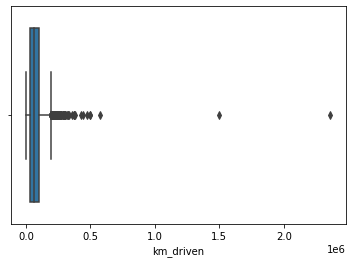

In [15]:
#kms driven outlier visualized
sns.boxplot(x=cars['km_driven'])
plt.xlabel('km_driven')

The amount of distance driven in kms by a car can be varied. The above plot evidents the possibility of highest possible distance covered by a car, i.e. 23,60,457 kms is the max value in that column, next is around 15lac kms of distance.

## Bi-Variate Analysis.

Let's divide the columns into categorical and numerical, it makes easy for us to plot the data at a time altogether.

In [16]:
#numerical features
numerical = [
    'year',
    'km_driven',
    'selling_price'
]

#categorical features
categorical = [
    'fuel',
    'transmission',
    'owner'
]

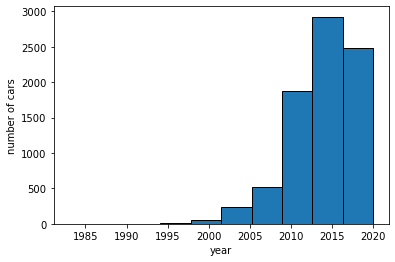

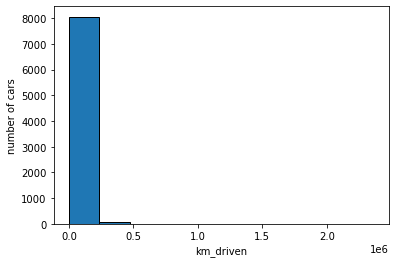

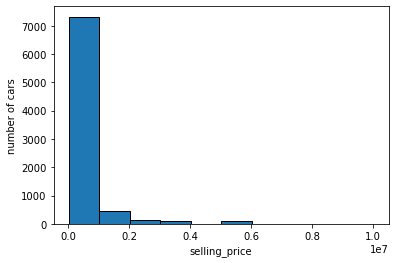

In [17]:
#look at numerical data distribution
for i in cars[numerical].columns:
    plt.hist(cars[numerical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of cars')
    plt.show()

    Year: The number of cars being sold are directly proportionaly to the years column. Newer the car is, more are those car sales.

    Kms driven: The amount of distance covered by the car has a direct influence on its price in the market. The plot clearly shows that the sales of cars are inversely proportional to the kms driven.

    selling price: The selling price which is an ultimate step before purchasing is crucial. Selling prices are based on various factors, above factors are some of those. If the price is lesser, more are the cars being sold.

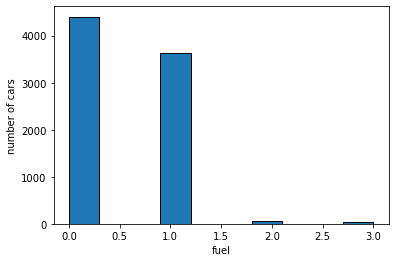

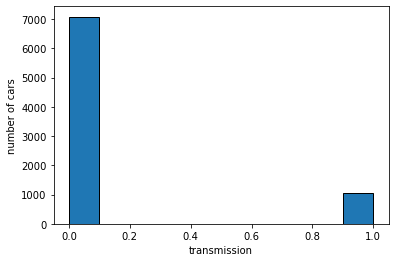

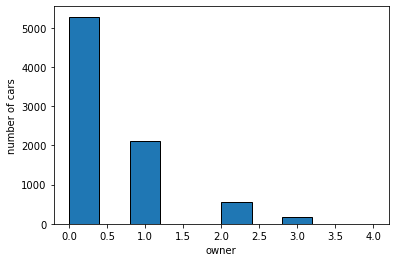

In [18]:
#look at categorical data distribution
for i in cars[categorical].columns:
    plt.hist(cars[categorical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of cars')
    plt.show()

In [19]:

#'fuel':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}}, inplace=True)


#{'transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)


#{'owner':{'1st': 0, '2nd': 1, '3rd': 2, '4th': 3, 'Test Drive Car': 4}}, inplace=True)

    fuel: Diesel cars are sold higher than the other fuel type cars. Cabs are everywhere and the cabs are mostly diesel fuel type. Petrol comes next in the line while LPG and CNG are tailenders.

    transmission: Manual cars sold higher than the automatic ones. Manual cars have less fuel consumption whereas the automatic ones do not give the enough mileage, thus, it's natural that the diesel cars sold more.

    Owner: The no.of previous owners of the car decides the final pricing, more are the owners, lesser will be the selling price.

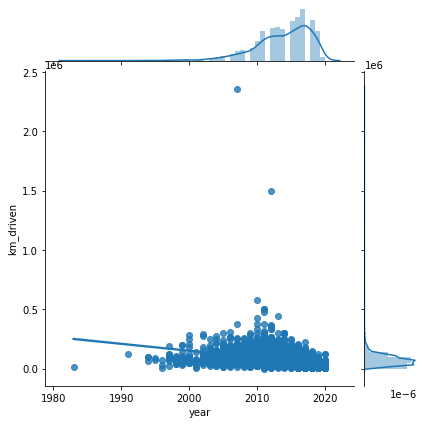

In [20]:
sns.jointplot(x="year", y="km_driven", data=cars, kind="reg")

The overall plot can give a gist of how much the car might have got driven the number of kms with respect to its year of purhcase.

From 2015 to 2020 - The kms driven is less compared its preceding year.

from 2010 to 2015 - The number of kms covered by the vehicle are significantly high.

Thus, kms driven and the year of purchase for deciding the selling price of cars are crucial.

---



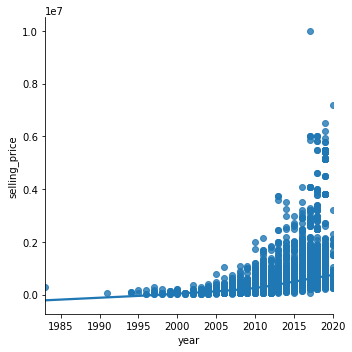

In [21]:
sns.lmplot(x="year", y="selling_price", data=cars, lowess=True)

Clearly, the plot suggests that the selling price hikes with respect to year elements nearing 2020.

Newer the model is, more will be the selling price. It's natural to assume the higher price cause of its mfg year.

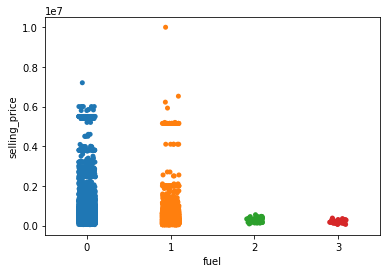

In [22]:
#stripplot comparing selling price and fuel type
sns.stripplot(y=cars['selling_price'],
              x=cars['fuel'])
plt.show()

0-Diesel fuel type distribution with the selling price looks more thick and more in number.

1-Petrol fuel type distribution is less thicker but more varied.

2 and 3 representing LPG and CNG are low in count. Not many check these options while purchasing

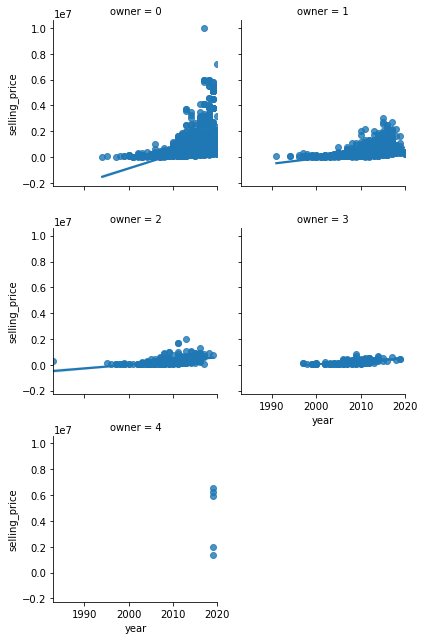

In [23]:
sns.lmplot(x="year", y="selling_price", col="owner", data=cars, col_wrap=2, height=3)

No.of owners and the year of purchase affects the selling price in the following  wise:

  1) lesser the count of owners, earlier year of purchase will hike the selling price

  2) More the count of owners, late year of purchase will depreciate the selling price.

The basic mentality of any customer is to go for a car which is as good as possible with lesser kms driven, year of purchase and lesser previous owners. 

## Model Building

In [24]:
X = cars.drop(['name', 'selling_price'], axis=1)
y = cars['selling_price']

'name' feature is dropped from the data since it do not add up anything to the final result.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas.util.testing as tm

<ipython-input-25-8778c7400b2e>:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)

### XGBRegressor

In [27]:
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)

model = regressor.fit(trainX, trainY)

In [28]:
# predict X train
trainPredict = model.predict(trainX)

# predict X test  
testPredict = model.predict(testX)

In [29]:
# Train X 

import math

# R Squared 
trainRsquared = metrics.r2_score(trainY, trainPredict)
print(f'R-Squared : {trainRsquared}')

# Mean Absolute Error
trainMAE = metrics.mean_absolute_error(trainY, trainPredict)
print(f'MAE : {trainMAE}')

#  Mean Squared Error
trainMSE = metrics.mean_squared_error(trainY, trainPredict)
print(f'MSE : {trainMSE}')

#  Root Mean Squared Error
trainRMSE = math.sqrt(metrics.mean_squared_error(trainY, trainPredict))
print(f'RMSE : {trainRMSE}')

# Median
trainM = metrics.median_absolute_error(trainY, trainPredict)
print(f'Median : {trainM}')

R-Squared : 0.8965744864824657
MAE : 121393.77318544942
MSE : 67307617283.07374
RMSE : 259437.11624028228
Median : 69175.4375


In [30]:
# Test X 

# R Squared 
testRsquared = metrics.r2_score(testY, testPredict)
print(f'R-Squared : {testRsquared}')

# Mean Absolute Error
testMAE = metrics.mean_absolute_error(testY, testPredict)
print(f'MAE : {testMAE}')

#  Mean Squared Error
testMSE = metrics.mean_squared_error(testY, testPredict)
print(f'MSE : {testMSE}')

#  Root Mean Squared Error
testRMSE = math.sqrt(metrics.mean_squared_error(testY, testPredict))
print(f'RMSE : {testRMSE}')

# Median
testM = metrics.median_absolute_error(testY, testPredict)
print(f'Median : {testM}')

R-Squared : 0.7560070124453683
MAE : 204793.27039309943
MSE : 156528522678.5578
RMSE : 395636.85707800003
Median : 113149.8125


### Defining the method to fit in the different models ony by one to find the maximum r2 score along with the appropriate random_state value.

In [31]:
def maxr2_score(mod,X,y):
    max_r_score=0
    for r in range(42,100):
        trainX, testX, trainY, testY = train_test_split(X, y,random_state = r,test_size=0.20)
        mod.fit(trainX,trainY)
        y_pred = mod.predict(testX)
        r2_scr=r2_score(testY,y_pred)
        print("r2 score corresponding to ",r," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r=r
    print("max r2 score corresponding to ",final_r," is ",max_r_score)
    return final_r

#### Cross validation score 

In [32]:
#Cross_val_score fucntion 

from sklearn.model_selection import cross_val_score
def model_evaluation(model,X,y):
    c_scores=cross_val_score(model,X,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

##### Cross validating XGBoost

In [45]:
model_evaluation(regressor, X, y)

Mean r2 score for regressor:  0.7325567543136582
standard deviation in r2 score for regressor:  0.06985586082669848
[0.78157848 0.69792646 0.76990684 0.61165127 0.80172072]


### Random Forrest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(X, y)
clf.best_params_

{'n_estimators': 500}

In [35]:
rfr = RandomForestRegressor(n_estimators = 500)
maxr2_score(rfr,X,y)

r2 score corresponding to  42  is  0.7651736064523335
r2 score corresponding to  43  is  0.7215847062180205
r2 score corresponding to  44  is  0.7214623077693917
r2 score corresponding to  45  is  0.7556443922333961
r2 score corresponding to  46  is  0.8055744446119935
r2 score corresponding to  47  is  0.6987453312444405
r2 score corresponding to  48  is  0.711223220650799
r2 score corresponding to  49  is  0.7758720795518229
r2 score corresponding to  50  is  0.7458312783720928
r2 score corresponding to  51  is  0.7765111476808529
r2 score corresponding to  52  is  0.7785583009548998
r2 score corresponding to  53  is  0.7640099254007386
r2 score corresponding to  54  is  0.7883741255467991
r2 score corresponding to  55  is  0.7732853175868637
r2 score corresponding to  56  is  0.7609136619563143
r2 score corresponding to  57  is  0.7757802242934735
r2 score corresponding to  58  is  0.7178824462588876
r2 score corresponding to  59  is  0.7867579767355287
r2 score corresponding to  60

72

#### Cross Validating RFR

In [36]:
#lets chcek Random forest using n_estimators=500 

rfr=RandomForestRegressor(n_estimators=500)

#Lets check the cross_val_score for Random Forest Regressor

print("Random Forest Regressor\n\n")
model_evaluation(rfr,X,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7464015997400051
standard deviation in r2 score for regressor:  0.0653241464176357
[0.79232897 0.70728444 0.80169212 0.63562843 0.79507405]


### KNR

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(X, y)
clf.best_params_

{'n_neighbors': 3}

In [38]:
knr=KNeighborsRegressor(n_neighbors=3)
maxr2_score(knr,X,y)

r2 score corresponding to  42  is  0.5762697946767583
r2 score corresponding to  43  is  0.5869780830183162
r2 score corresponding to  44  is  0.5534687200009403
r2 score corresponding to  45  is  0.5750796137044403
r2 score corresponding to  46  is  0.6704137460911881
r2 score corresponding to  47  is  0.5621349202712466
r2 score corresponding to  48  is  0.5866109764671166
r2 score corresponding to  49  is  0.5793009455638488
r2 score corresponding to  50  is  0.5766975466072364
r2 score corresponding to  51  is  0.65540270754275
r2 score corresponding to  52  is  0.6780755170313122
r2 score corresponding to  53  is  0.6575800072400491
r2 score corresponding to  54  is  0.6440823909944984
r2 score corresponding to  55  is  0.6409029618087483
r2 score corresponding to  56  is  0.630996538691549
r2 score corresponding to  57  is  0.6153084766043491
r2 score corresponding to  58  is  0.6023647237003105
r2 score corresponding to  59  is  0.6670727474967657
r2 score corresponding to  60  

63

#### Cross Validating KNR

In [41]:
knr=KNeighborsRegressor(n_neighbors=3)

#Lets check the cross_val_score for Random Forest Regressor

print("KNR \n\n")
model_evaluation(knr,X,y)

KNR 


Mean r2 score for regressor:  0.6536035356661914
standard deviation in r2 score for regressor:  0.05595409332593448
[0.6672741  0.66550248 0.69144038 0.54481591 0.69898481]


### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

le=LinearRegression()
r = maxr2_score(le,X,y)

r2 score corresponding to  42  is  0.4551235347564978
r2 score corresponding to  43  is  0.4525128504309346
r2 score corresponding to  44  is  0.4348864644216607
r2 score corresponding to  45  is  0.445148258105616
r2 score corresponding to  46  is  0.44294906685041013
r2 score corresponding to  47  is  0.43256002084113054
r2 score corresponding to  48  is  0.41900745379669957
r2 score corresponding to  49  is  0.47990435277704957
r2 score corresponding to  50  is  0.4574401087977149
r2 score corresponding to  51  is  0.45545947868744585
r2 score corresponding to  52  is  0.46467189807350306
r2 score corresponding to  53  is  0.4398446722041731
r2 score corresponding to  54  is  0.45988603377478576
r2 score corresponding to  55  is  0.4427609534141205
r2 score corresponding to  56  is  0.47726925125786457
r2 score corresponding to  57  is  0.4739830048352285
r2 score corresponding to  58  is  0.4259189673979972
r2 score corresponding to  59  is  0.4624703208728159
r2 score correspondin

#### Cross Valaidating Linear Regression

In [44]:
print("LinearRegression\n\n")

model_evaluation(le,X,y)

LinearRegression


Mean r2 score for regressor:  0.46009984594495296
standard deviation in r2 score for regressor:  0.013665648644371461
[0.47004697 0.46557173 0.46820915 0.43313188 0.46353949]


Linear regressor model is doing a worst prediction, we can skip this model.

### The final aggregation of all the models and thier performances.

In [50]:
print("Random Forest Regressor\n")
print(model_evaluation(rfr,X,y))

print('\n')

print("XGBoost\n")
print(model_evaluation(regressor, X, y))

print("\n")

print("KNR\n\n")
model_evaluation(knr,X,y)

print('\n')

print("Linear Regression\n\n")
model_evaluation(le,X,y)

Random Forest Regressor

Mean r2 score for regressor:  0.747271858932745
standard deviation in r2 score for regressor:  0.06415823062122601
[0.79099526 0.71175335 0.80012127 0.6368973  0.79659213]
None


XGBoost

Mean r2 score for regressor:  0.7325567543136582
standard deviation in r2 score for regressor:  0.06985586082669848
[0.78157848 0.69792646 0.76990684 0.61165127 0.80172072]
None


KNR


Mean r2 score for regressor:  0.6536035356661914
standard deviation in r2 score for regressor:  0.05595409332593448
[0.6672741  0.66550248 0.69144038 0.54481591 0.69898481]


Linear Regression


Mean r2 score for regressor:  0.46009984594495296
standard deviation in r2 score for regressor:  0.013665648644371461
[0.47004697 0.46557173 0.46820915 0.43313188 0.46353949]


Post cross validation of all the models, Random Forest Regressor model gives the best r2 svore

*******

### Saving the final model (Random Forest Regressor)

In [54]:
trainX, testX, trainY, testY = train_test_split(X, y,random_state = 72,test_size=0.20)

In [55]:
rfr.fit(trainX, trainY)
y_pred = rfr.predict(testX)

y_pred

array([513362.31497998, 329055.67393974, 123206.904     , ...,
       271452.74592075, 559340.70277214, 182535.4505772 ])

In [56]:
print("r2_score is: ",r2_score(testY,y_pred))

r2_score is:  0.8541415915197639


In [62]:
price_prediction = y_pred

#lets make the dataframe for price_prediction

price_prediction=pd.DataFrame(price_prediction,columns=["Price"])

In [63]:
#Lets save the submission to csv

#price_prediction.to_csv("Cars_Price_Prediction(final).csv",index=False)